In [1]:
import tilelit as ti

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
im_er = ti.tiff_resize('/home/ubuntu/case01-ER.tiff')
im_her = ti.tiff_resize('/home/ubuntu/case01-HER2.tiff')
im_he = ti.tiff_resize('/home/ubuntu/case01-H&E.tiff')

/home/ubuntu/anaconda3/lib/python3.5/site-packages/skimage/external/tifffile/tifffile.py:2573: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  tile = decompress(tile)
/home/ubuntu/anaconda3/lib/python3.5/site-packages/skimage/external/tifffile/tifffile.py:2579: UserWarning: invalid tile data
  warnings.warn("invalid tile data")
/home/ubuntu/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
im_er.shape

(3008, 2340, 4)

In [5]:
im_er.shape

(3008, 2340, 4)

In [6]:
img_er_bw = im_er[..., 2] #np.sum(im_er, -1)
img_he_bw = im_he[..., 2] #np.sum(im_he, -1)

In [7]:
img_initial, aff_initial  = ti.initial_alignment(img_er_bw, img_he_bw)

In [8]:
img_final, aff_final = ti.fine_alignment(img_er_bw, img_he_bw, starting_affine=aff_initial)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


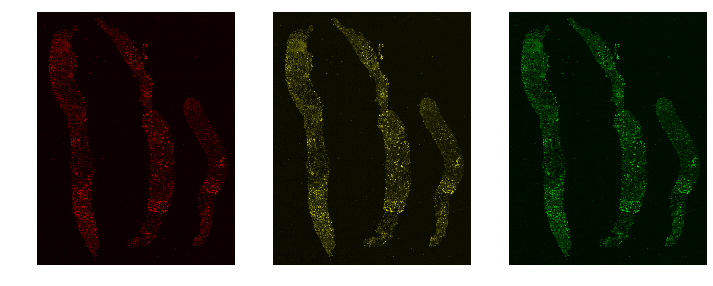

In [9]:
new_image1, new_image2 = ti.plot_together(1-(img_final/img_final.max()), 1-(img_er_bw/img_er_bw.max()))
#new_image1, new_image2 = plot_together(ax, img_final, img_er_bw)

In [10]:
aff_final

array([[  9.99998295e-01,   2.87055918e-06,   2.02097644e-08],
       [  2.26860181e-06,   9.99996257e-01,   1.37412378e-08],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [11]:
box_size = (100, 100)

In [12]:
y_center = round(np.random.rand() * (im_er.shape[0] - box_size[0]//2) + box_size[0] // 2)

In [13]:
x_center = round(np.random.rand() * (im_er.shape[1] - box_size[1]//2) + box_size[1] // 2)

In [14]:
corner1 = np.array([y_center - box_size[0] // 2, x_center - box_size[1] // 2, 1])
corner2 = np.array([y_center + box_size[0] // 2, x_center + box_size[1] // 2, 1])

In [15]:
foo = im_er[corner1[0]:corner2[0], corner1[1]:corner2[1]]

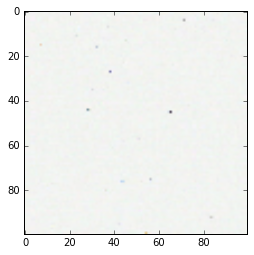

In [16]:
plt.imshow(foo)

In [17]:
aff_final

array([[  9.99998295e-01,   2.87055918e-06,   2.02097644e-08],
       [  2.26860181e-06,   9.99996257e-01,   1.37412378e-08],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [18]:
corner1_trans = (np.round(np.dot(aff_final, corner1))).astype(int)

In [19]:
corner2_trans = (np.round(np.dot(aff_final, corner2))).astype(int)

In [20]:
corner1, corner2, corner1_trans, corner2_trans

(array([1843,  955,    1]),
 array([1943, 1055,    1]),
 array([1843,  955,    1]),
 array([1943, 1055,    1]))

In [21]:
foo = im_he[corner1_trans[0]:corner2_trans[0], corner1_trans[1]:corner2_trans[1]]

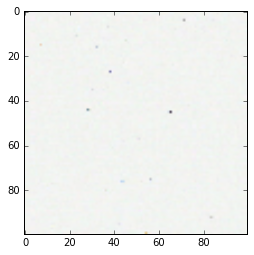

In [22]:
plt.imshow(foo)